<a href="https://colab.research.google.com/github/alanabates/EDA-and-Predictive-Analytics-in-Python/blob/main/__Q2_Bates_Alana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explain the reasons behind Dimension Reduction?

**Answer** Dimension reduction reduces the number of features that are being considered by maintaining and/or creating important variables that have a strong response and eliminating variables that have a weak response. One of the main reasons for why dimension reduction is used is when the dataset you are working with is high-dimensional which means the dataset includes more columns than observations. Dimension reduction is necessary when working with high-dimensional data for predictive purposes as predictive analytics is intended for data with more observations than rows. Additionally, dimension reduction is useful when ther is an overfitting issue with your model and dimension reduction helps you avoid using overly complex models by helping you achieve the simplest model that achieves the desired predictive results. Lastly, dimensional reduction is helpful in inferential statistics to reduce multi-colinearity.



Define multicollinearity?

**Answer** Multi-collinearity occurs when the predictor or independent variables have strong correlations between each other. When multi-collinearity exists between dependent variables in inferential statistics, it can make the model results less reliable. However, in predictive analytics, multi-collinearity is not a significant issue as it is in inferential statistics as it does not effect the accuracy of a predictive model but does effect the reliability of an inferential model.

Define PCA.

**Answer** PCA stands for principal component analysis which is a method to reduce the dimensionality of a dataset in order to acount for variation in the dataset with the least amount of variables that still allows for accuracy. PCA does this by rebuilding the dataset through identifying a new, smaller set of variables that retais the dataset sample's variation and then ranking the new variables by the amount of variation each one explains. The new set of variables identified through PCA are called principal components (PCs). PCs are uncorrelated with one another but they are correlated with the response variable. Through eliminating feature redundancy, PCA creates better visualizations of high dimensional data.

What is the difference between PCA and LDA?

**Answer** PCA is a unsupervised learning technique. This means that PCA is conducted on data that does include outcome labels. On the other hand, LDA is a supervised learning technique that is conducted on data that does include outcome labels. Thus, LDA allows us to retain the class response information while PCA does not consider class response when recasting the data. 

**PCA**

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values

In [ ]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

Is it necessary to standardize the data? Why?

**Answer** Yes, it is necessary to standardize the data when using PCA. Standardization is neccessary as PCA calculates a new projection of the dataset with new axes based on the standard deviation of the variables. Since variables with a high standard deviation will have a higher weight for the of axis compared to variables with a low standard deviation, standardization is necessary to ensure all variables have the same weight for the calculation by making sure all variables have the same units for their standard deviation. If the data is not standardized before PCA, then PCA will not be able to find the optimal PCs. 

In [ ]:
df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


How is correlation used for dimension reduction?

**Answer** Correlation is used for dimension reduction with the PCA technique to determine the correlation among the predictors and the response variable. With PCA, the PC's are uncorrelated with each other but are correlated with the response variable. Additionally, correlation between predictors can be used to represent variation. If high levels of correlation exist between the predictors, the data points will fall closely in a straight line which can then be used to represent variation among data points as a new one-dimensional axis. 

Do we always need to split our dataset into train and test? Should we do it when we want to perform PCA?

**Answer** You do not always beed to split the dataset into a training and test set as it may depend on the model type, the question, and the purpose for your analysis. However, you should split the dataset before performing PCA if you are building a model that will obtain new, unknown data in the future. In this case, you need to split the dataset and conduct PCA on both the training set and the test set seperately in order for the model to generalize well to future, unknown data. 

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

If we use PC1 what percentage of dataset can we explain?

**Answer** If we use PC1, we can explain 72.8% of the variance in the dataset, according to the PCA explained variance ratio above. 


In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])#, 'principal component 3'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [ ]:
finalDf.corr()

,principal component 1,principal component 2
principal component 1,1.000000e+00,1.309361e-16
principal component 2,1.309361e-16,1.000000e+00


Is there a situation that correlation between PC1 and PC2 is more than 0.5?

**Answer** No, there is not. PCs are not correlated with each other but are only correlated with the response variable. 

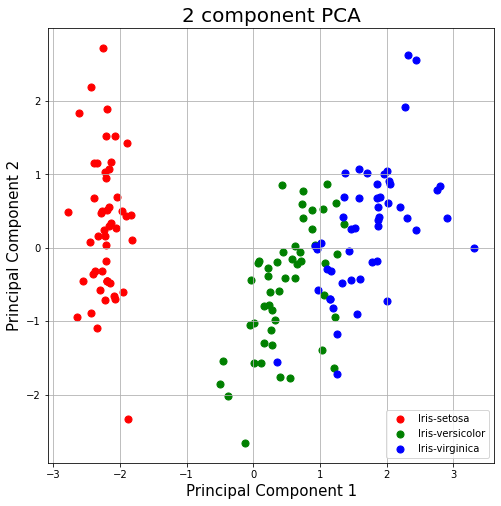

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Can we use PCA for classification? Explain!

**Answer** No, you cannot use PCA for classification problems. While PCA is useful for the compression and classification of data to reduce dimensionality of a dataset, PCA is not a classifier as it is an unsupervised learning technique. Since PCA does not include outcome labels, it cannot be used for classification problems. LDA on the other hand, can be used for calssification problems as it is a supervised dimension reduction technique. 

What are the three cases of regression response variables that were discussed in lecture?  Please describe each one and the distribution of data used for each.

**Answer** The three cases of regression response variables that we discussed in the lecture are linear, binary categorical, and count. With a linear response variables, a linear regression is used where the response variable Y is normally distributed and continuous. Linear response variables have a linear relationship and a normal distribution. With a binary categorical response variable, logistic regression is used and the response variable Y is distributed as a binary variable such as the probability of a "Yes" or a "No". Binary categorical variables have a Bernoulli distribution. With count response variables, a Poisson regression is used that estimates Y through a link function that squashes the distribution. The distribution of data for a count response variable is the Poisson distribution. 

What kind of regression should we use when trying to predict a count response variable?

**Answer** In order to predict a count response variable, we should use a Poisson regression which is a type of generalized linear model that estimates Y through a link function that squashes the distribution. With a Poisson regression, you assume that Y is distributed as a Poisson variable and Poisson uses Lambda to determine the shape of count data. 

Hands on Analysis:

For the following exercises, work with the cereals data set. A link to the raw data is here:

https://raw.githubusercontent.com/jjghockey/DESC624/main/cereals.CSV

* Standardize or normalize the predictors Sugars, Fiber, and Potass.
Construct the correlation matrix for Sugars, Fiber, and Potass. Which variables are highly correlated?
* Build a regression model to estimate Rating based on Sugars, Fiber, and Potass. 
* Run PCA using three components. What percent of the variability is explained by one component? By two components? By all three components?
* Say we want to explain at least 70% of the variability. How many components would you retain?
* Run PCA using two components. What percent of the variability do the two components explain?
* Use the two components as the predictor variables in a regression model to estimate Rating. What are the regression coefficients of the two components?

In [ ]:
##Python Packages
from sklearn import tree
import pydotplus
import matplotlib.image as pltimg
import seaborn as sn
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/jjghockey/DESC624/main/cereals.CSV"
# loading dataset into Pandas DataFrame
df = pd.read_csv(url)


In [ ]:
df.head()

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,...,1.0,0.33,68.402973,1,1,0,0,0,0,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,...,1.0,1.00,33.983679,1,0,1,0,0,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,...,1.0,0.33,59.425505,1,0,0,1,0,0,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,...,1.0,0.50,93.704912,1,0,0,1,0,0,0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,...,1.0,0.75,34.384843,1,0,0,0,0,1,0


In [ ]:
data_full = pd.read_csv(url)

#selecting subset of data
data = data_full[['Rating','Fiber','Sugars','Potass']]

In [ ]:
# Getting rid of NaN variables
import numpy as np
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
data = data.reset_index()

Question 1: Standardize or normalize the predictors Sugars, Fiber, and Potass. Construct the correlation matrix for Sugars, Fiber, and Potass. Which variables are highly correlated?

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ["Fiber","Sugars","Potass"]
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Rating']].values

In [ ]:
# Getting rid of NaN issue
import numpy as np
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.reset_index()

In [ ]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
# Correlation Matrix
df.corr()

,index,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,...,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
index,1.000000,0.043972,0.025197,-2.108411e-01,-0.123240,-0.212592,0.400396,-0.198401,-0.136432,0.177082,...,0.001417,0.161808,0.106242,-2.410486e-02,0.165005,-0.035754,-0.080886,0.091174,0.001834,2.410486e-02
Calories,0.043972,1.000000,0.033992,5.073732e-01,0.296247,-0.295212,0.270606,0.569121,-0.071361,0.259846,...,0.696452,0.089196,-0.693785,4.172898e-02,-0.314504,-0.208955,0.056855,0.143116,0.142470,-4.172898e-02
Protein,0.025197,0.033992,1.000000,2.023534e-01,0.011559,0.514006,-0.036743,-0.286584,0.578743,0.054800,...,0.230671,-0.242099,0.467162,-1.628253e-01,0.072175,-0.068911,0.087147,-0.118906,0.017520,1.628253e-01
Fat,-0.210841,0.507373,0.202353,1.000000e+00,0.000822,0.014036,-0.284934,0.287152,0.199637,-0.030514,...,0.221714,-0.157579,-0.405050,-7.846449e-17,-0.215353,0.230879,-0.262781,0.236525,0.046176,3.341901e-18
Sodium,-0.123240,0.296247,0.011559,8.219036e-04,1.000000,-0.070735,0.328409,0.037059,-0.039438,0.331576,...,0.312534,0.119584,-0.383012,2.311603e-01,-0.436701,-0.222740,0.101439,0.301370,0.139549,-2.311603e-01
Fiber,-0.212592,-0.295212,0.514006,1.403587e-02,-0.070735,1.000000,-0.379084,-0.150949,0.911504,-0.038717,...,0.246292,-0.513697,0.603411,1.057946e-01,0.271133,-0.138697,0.157206,-0.244008,-0.023591,-1.057946e-01
Carbo,0.400396,0.270606,-0.036743,-2.849337e-01,0.328409,-0.379084,1.000000,-0.452069,-0.365003,0.253579,...,0.144805,0.358284,0.055941,-3.846384e-02,0.018822,-0.264109,0.069618,-0.000413,0.285418,3.846384e-02
Sugars,-0.198401,0.569121,-0.286584,2.871525e-01,0.037059,-0.150949,-0.452069,1.000000,0.001414,0.072954,...,0.460547,-0.032436,-0.755955,1.110547e-01,-0.305162,-0.072062,0.070901,0.127163,-0.093393,-1.110547e-01
Potass,-0.136432,-0.071361,0.578743,1.996367e-01,-0.039438,0.911504,-0.365003,0.001414,1.000000,-0.002636,...,0.420562,-0.501688,0.415782,5.841428e-03,0.177757,-0.134198,0.043213,-0.122758,0.016664,-5.841428e-03
Vitamins,0.177082,0.259846,0.054800,-3.051391e-02,0.331576,-0.038717,0.253579,0.072954,-0.002636,1.000000,...,0.320435,0.133630,-0.214481,2.142830e-02,-0.231637,-0.215577,0.173733,0.181335,-0.059178,-2.142830e-02


**Answer to which variables are highly correlated:** Sugars is correlated with Rating with a negative correlation of -0.756. Potass does not have a high correlation with Rating with a correlation of 0.416. Fiber is correlated with Rating with a correlation of 0.603.

Question 2. Build a regression model to estimate Rating based on Sugars, Fiber, and Potass.

In [ ]:
# Setting up the Regression
x = df[['Fiber', 'Sugars', 'Potass']]
y = df['Rating']

In [ ]:
# Linear Regression Model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(model.coef_)

[ 3.92903182 -2.07465665 -0.044444  ]


In [ ]:
print(model.intercept_)

52.730745383831206


In [ ]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
Fiber,3.929032
Sugars,-2.074657
Potass,-0.044444


In [ ]:
predictions = model.predict(x_test)

In [ ]:
print(predictions)

[44.14090882 46.81323558 50.1445973  53.40503053 53.18281052 23.7621673
 32.05885537 39.03566405 45.55084396 62.22471221 35.70430233 59.18456045
 47.24811198 48.4358271  32.28107539]


Question 3. Run PCA using three components. 

**Question code below.**

What percent of the variability is explained by one component? By two components? By all three components?

**Answer** As shown by the PCA explained variance ratio below, 99.6% of the variance is explained by one component, 0.379% of the variance is explained by two components, and 0.0168% is explained by all three components. 

In [ ]:
# Running PCA for 3 Components 
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)

In [ ]:
pca.explained_variance_ratio_

array([9.96039682e-01, 3.79192896e-03, 1.68389061e-04])

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDf = pd.concat([principalDf, df[['Rating']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,Rating
0,181.642069,-1.308841,2.058714,68.402973
1,36.463369,1.001373,-1.228820,33.983679
2,221.591417,-2.109919,-0.266767,59.425505
3,231.741956,-7.504564,3.959858,93.704912
4,-28.520499,2.864023,0.467477,29.509541


Question 4. Run PCA using two components.

**Question code below.**

What percent of the variability do the two components explain?

**Answer** As shown by the PCA explained variance ratio below, 99.6% of variance is explained by the first component and 0.379% of the variance is explained by the two components. 

In [ ]:
# Running PCA for 2 Components 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

In [ ]:
pca.explained_variance_ratio_

array([0.99603968, 0.00379193])

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['Rating']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Rating
0,181.642069,-1.308841,68.402973
1,36.463369,1.001373,33.983679
2,221.591417,-2.109919,59.425505
3,231.741956,-7.504564,93.704912
4,-28.520499,2.864023,29.509541


Say we want to explain at least 70% of the variability. How many components would you retain?

**Answer** If we wanted to explain at least 70% of the variability, we would only need to retain one component as the explained variance for PC1 is 99.6% as shown above. 

Question 6. Use the two components as the predictor variables in a regression model to estimate Rating. What are the regression coefficients of the two components?

In [ ]:
from sklearn.preprocessing import scale

In [ ]:

X = data[['Fiber','Sugars','Potass']]
y = data[['Rating']]

#scaling predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#defining cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)



array([ 64.12,  97.47, 100.  ])

In [ ]:
#splitting the dataset into training (80%) and testing (20%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

#scaling the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#training PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

pred = regr.predict(X_reduced_test)

In [ ]:
print(regr.coef_)

[[6.52221821]]


In [ ]:
print(pred)

[[61.28433672]
 [42.12412746]
 [31.9984968 ]
 [47.71729835]
 [29.51141785]
 [54.20600843]
 [43.64676399]
 [35.65819911]
 [38.33930321]
 [48.52115257]
 [47.71729835]
 [45.05089165]
 [31.34861771]
 [51.13942491]
 [33.57533916]]
